## Hypothesis Test

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [3]:
%%R
# import merged.csv using R

df <- read_csv('merged.csv', show_col_types = FALSE)

### Hypothesis Testing

H0: There is no difference in estimated median income and areas where there are landfills.

Ha: There is a difference in estimated median income and areas where there are landfills.
 

In [4]:
%%R
# create a new column that changes values of "Current Landfill Status" such that 'Open' is 1 and 'Closed' is 0 and 'Unknown' is NA
df <- df %>%
    mutate(status = case_when(
        `Current Landfill Status` == 'Open' ~ 1,
        `Current Landfill Status` == 'Closed' ~ 0,
        TRUE ~ NA_real_
    ))


In [5]:
%%R

# t-test for Current Landfill Status and estimate

t.test(df$status, df$estimate, alternative = 'two.sided', mu = 0, paired = FALSE, conf.level = 0.95)


	Welch Two Sample t-test

data:  df$status and df$estimate
t = -6.9909, df = 101, p-value = 3.006e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -46593.33 -25995.46
sample estimates:
   mean of x    mean of y 
4.242424e-01 3.629482e+04 



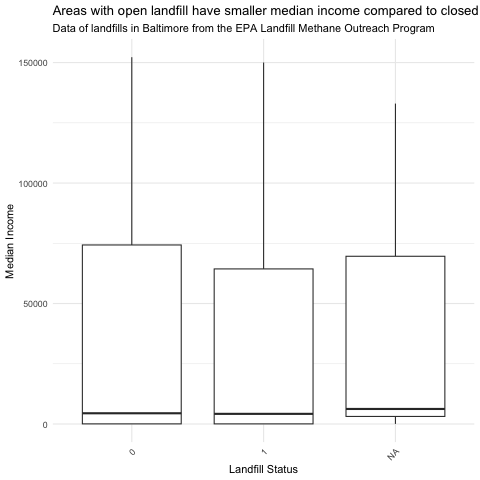

In [6]:
%%R

# create boxplot of estimate by Current Landfill Status whether it is open or closed

df %>%

    ggplot(aes(x = factor(status), y = estimate)) +
    geom_boxplot() +
    labs(title = 'Areas with open landfill have smaller median income compared to closed landfills', subtitle = 'Data of landfills in Baltimore from the EPA Landfill Methane Outreach Program') +
    xlab('Landfill Status') +
    ylab('Median Income') +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1)
    )


### Results:

p-value = 3.006e-10

The null hypothesis is rejected because the p-value is low. There is a difference in estimated median income and areas where there are landfills. 